## Importacion de la libreria de Pandas y numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Importacion de Datasets

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1PrFqb_aCvaWFS7DyZZCjOrQIUuDK5cgD'
output = 'data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PrFqb_aCvaWFS7DyZZCjOrQIUuDK5cgD
To: /content/data.csv
100%|██████████| 5.15M/5.15M [00:00<00:00, 196MB/s]


'data.csv'

In [ ]:
df = pd.read_csv('data.csv', encoding='latin-1')
# Crea un objeto DataFrame con los datos
df = pd.read_csv('data.csv', encoding='latin-1')

# Crea un diccionario que mapee los nombres de las primeras variables a los nombres de las segundas
# Es la misma variable, solo se le cambia el nombre. Pequeña distincion conceptual.


# Y hay una forma mucho más efectiva de hacerlo. Est alinea de codigo hace todo lo que escribiste mas abajo.
df.rename(columns=dict(zip(df.columns, [column.upper() for column in df.columns])), inplace=True)


# df.rename (columns={
#      'id': 'ID',
#     'nhogar': 'NHOGR',
#     'miembro': 'MIEMBRO',
#     'comuna': 'COMUNA',
#     'dominio': 'DOMINIO',
#     'edad': 'EDAD',
#     'sexo': 'SEXO',
#     'parentesco_jefe': 'PARENTESCO_JEFE',
#     'situacion_conyugal': 'SITUACION_CONYUGAL',
#     'num_miembro_padre': 'NUM_MIEMBRO_PADRE',
#     'num_miembro_madre': 'NUM_MIEMBRO_MADRE',
#     'estado_ocupacional': 'ESTADO_OCUPACIONAL',
#     'cat_ocupacional': 'CAT_OCUPACIONAL',
#     'calidad_ingresos_lab': 'CALIDAD_INGRESOS_LAB',
#     'ingreso_total_lab': 'INGRESO_TOTAL_LAB',
#     'calidad_ingresos_no_lab': 'CALIDAD_INGRESOS_NO_LAB',
#     'ingreso_total_no_lab': 'INGRESO_TOTAL_NO_LAB',
#     'calidad_ingresos_totales': 'CALIDAD_INGRESOS_TOTALES',
#     'ingresos_totales': 'INGRESOS_TOTALES',
#     'calidad_ingresos_familiares': 'CALIDAD_INGRESOS_FAMILIARES',
#     'ingresos_familiares': 'INGRESOS_FAMILIARES',
#     'ingreso_per_capita_familiar': 'INGRESO_PER_CAPITA_FAMILIAR',
#     'estado_educativo': 'ESTADO_EDUCATIVO',
#     'sector_educativo': 'SECTOR_EDUCATIVO',
#     'nivel_actual': 'NIVEL_ACTUAL',
#     'nivel_max_educativo': 'NIVEL_MAX_EDUCATIVO',
#     'años_escolaridad': 'ANOS_ESCOLARIDAD',
#     'lugar_nacimiento': 'LUGAR_NACIMIENTO',
#     'afiliacion_salud': 'AFILIACION_SALUD',
#     'hijos_nacidos_vivos': 'HIJOS_NACIDOS_VIVOS',
#     'cantidad_hijos_nac_vivos': 'CANTIDAD_HIJOS_NAC_VIVOS'
# }, inplace=True)

# df.head()

# Encuesta Anual de Hogares (EAH)


Fuente: https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares

## ABSTRACT

La Dirección General de Estadísticas y Censos (DGEyC) de la Ciudad de Buenos Aires lleva a cabo anualmente la Encuesta Anual de Hogares (EAH), cuyo objetivo principal es obtener información valiosa sobre las características demográficas, educativas, laborales y de salud de la población de la ciudad. Esta encuesta se realiza en todo el territorio de la ciudad y se diseña una muestra representativa que permita obtener resultados confiables para el total de la ciudad y cada una de sus comunas.

La EAH es una herramienta fundamental para la planificación de políticas y programas sociales, educativos y laborales en la ciudad. La información recopilada en esta encuesta permite conocer la situación de la población de la Ciudad de Buenos Aires en diversas áreas, como la salud, la educación y el empleo, lo que a su vez permite diseñar estrategias y programas específicos para abordar las necesidades y problemáticas de cada comunidad y grupo de población.

Además, la EAH permite el análisis de la evolución de diversas variables sociodemográficas a lo largo del tiempo, lo que permite identificar tendencias y patrones que pueden ser útiles para la toma de decisiones informadas en la planificación de políticas públicas a largo plazo. En este sentido, el análisis de los resultados de la EAH puede contribuir significativamente a la mejora del bienestar y la calidad de vida de la población de la Ciudad de Buenos Aires.

## Preguntas e Hipotesis

1. **¿La ubicación geográfica influye en el ingreso familiar?**

  - Hipótesis nula: No existe una diferencia significativa en el ingreso familiar promedio entre distintas zonas geográficas en la Ciudad de Buenos Aires.
  - Hipótesis alternativa: Existe una diferencia significativa en el ingreso familiar promedio entre distintas zonas geográficas en la Ciudad de Buenos Aires.

2. **¿Cuál es la relación entre el número de integrantes de la familia y el ingreso total?**

  - Hipótesis nula: No existe una correlación significativa entre el número de integrantes de la familia y el ingreso total familiar en la Ciudad de Buenos Aires.
  - Hipótesis alternativa: Existe una correlación significativa entre el número de integrantes de la familia y el ingreso total familiar en la Ciudad de Buenos Aires.

3. **¿Existe una relación entre el ingreso per cápita familiar y la situación conyugal de los miembros del hogar?**
  - Hipótesis nula: No existe una diferencia significativa en el ingreso per cápita familiar entre los hogares con miembros casados y los hogares con miembros solteros o en otra situación conyugal en la Ciudad de Buenos Aires.
  - Hipótesis alternativa: Existe una diferencia significativa en el ingreso per cápita familiar entre los hogares con miembros casados y los hogares con miembros solteros o en otra situación conyugal en la Ciudad de Buenos Aires.

4. **¿Existe una relación entre la educación y el ingreso total de los hogares por familia en la Ciudad de Buenos Aires?**
  - Hipótesis nula: No existe una correlación significativa entre el nivel educativo de los miembros de la familia y el ingreso total familiar en la Ciudad de Buenos Aires.
  - Hipótesis alternativa: Existe una correlación significativa entre el nivel educativo de los miembros de la familia y el ingreso total familiar en la Ciudad de Buenos Aires.

###OBJETIVO

El objetivo de esta actividad es realizar un análisis de datos utilizando la Encuesta Anual de Hogares (EAH) de la Ciudad de Buenos Aires para identificar las variables que afectan el ingreso total de una familia y construir un modelo de regresión lineal que permita predecir el ingreso total en función de estas variables.



###CONTEXTO COMERCIAL

La Dirección General de Estadísticas y Censos (DGEyC) de la Ciudad de Buenos Aires lleva a cabo la Encuesta Anual de Hogares (EAH) para obtener información valiosa sobre las características demográficas, educativas, laborales y de salud de la población de la ciudad. La información recopilada en esta encuesta es fundamental para la planificación de políticas y programas sociales, educativos y laborales en la ciudad.



###Problema Comercial


La DGEyC quiere entender qué factores influyen en el ingreso total de las familias en la ciudad y cómo se pueden utilizar estos factores para planificar políticas y programas que mejoren el bienestar y la calidad de vida de la población.



###Contexto Analítico


Se utilizará la Encuesta Anual de Hogares (EAH) de la Ciudad de Buenos Aires para realizar un análisis exploratorio de datos y construir un modelo de regresión lineal. Se identificarán las variables que tienen una mayor correlación con el ingreso total de las familias y se utilizará un enfoque de modelado de regresión lineal para predecir el ingreso total en función de estas variables.

# EDA

In [ ]:
# Mostramos las primeras filas del DataFrame

df.head()

,ID,NHOGAR,MIEMBRO,COMUNA,DOMINIO,EDAD,SEXO,PARENTESCO_JEFE,SITUACION_CONYUGAL,NUM_MIEMBRO_PADRE,...,INGRESO_PER_CAPITA_FAMILIAR,ESTADO_EDUCATIVO,SECTOR_EDUCATIVO,NIVEL_ACTUAL,NIVEL_MAX_EDUCATIVO,AÑOS_ESCOLARIDAD,LUGAR_NACIMIENTO,AFILIACION_SALUD,HIJOS_NACIDOS_VIVOS,CANTIDAD_HIJOS_NAC_VIVOS
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


##Verificacion de datos faltantes
Una vez cargados los datos, lo primero que debemos hacer es ver el tamaño del conjunto de datos y si hay datos faltantes.

In [ ]:
# # Verificamos el tamaño del conjunto de datos
# print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas")

# # Verificamos si hay valores faltantes
# print("Valores faltantes por columna:")
# print(df.isnull().sum())


# Esto puede presentarse mejor con display, ordenando los valores por mayor conteo de nulos e ignorando aquellos que no tienen nulos, similar a lo que realizaste abajo pero con menos codigo
# y en una sola presentación
display(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas",
"Valores faltantes por columna:",
df.isnull().sum().sort_values(ascending=False)[df.isnull().sum()>0])

'El conjunto de datos tiene 14319 filas y 31 columnas'

'Valores faltantes por columna:'

HIJOS_NACIDOS_VIVOS    7784
NIVEL_MAX_EDUCATIVO    1054
AÑOS_ESCOLARIDAD         62
AFILIACION_SALUD          4
SECTOR_EDUCATIVO          3
LUGAR_NACIMIENTO          1
SITUACION_CONYUGAL        1
dtype: int64

In [ ]:
nun_missing = (df[['NHOGR','MIEMBRO','COMUNA','EDAD','INGRESO_TOTAL_LAB','INGRESO_TOTAL_NO_LAB','INGRESOS_TOTALES','INGRESOS_FAMILIARES','INGRESO_PER_CAPITA_FAMILIAR']] == 0).sum()
print(nun_missing)

NHOGR                              0
MIEMBRO                            0
COMUNA                             0
EDAD                             128
INGRESO_TOTAL_LAB               6963
INGRESO_TOTAL_NO_LAB           10247
INGRESOS_TOTALES                4295
INGRESOS_FAMILIARES               76
INGRESO_PER_CAPITA_FAMILIAR       76
dtype: int64


<Axes: >

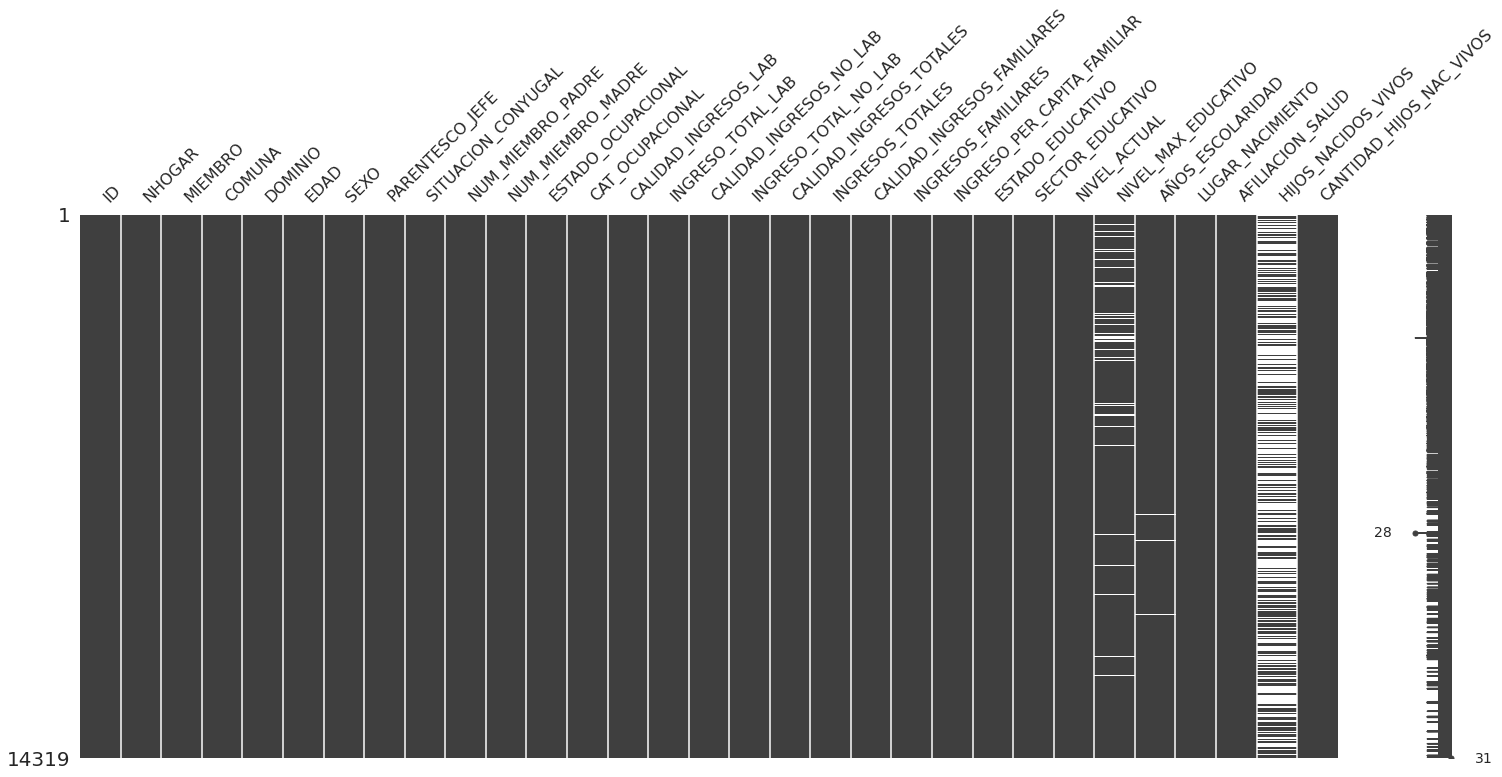

In [ ]:
# importamos a la libreria reciente instalada
import missingno as msno

# Para que el gráfico esté incrustado en la libreta de Colab
%matplotlib inline

# La matriz de nulidad msno.matrix permite visualizar patrones
# de los dato faltantes.
# todas aquellas que esten en blanco tienen valores faltantes

msno.matrix(df)

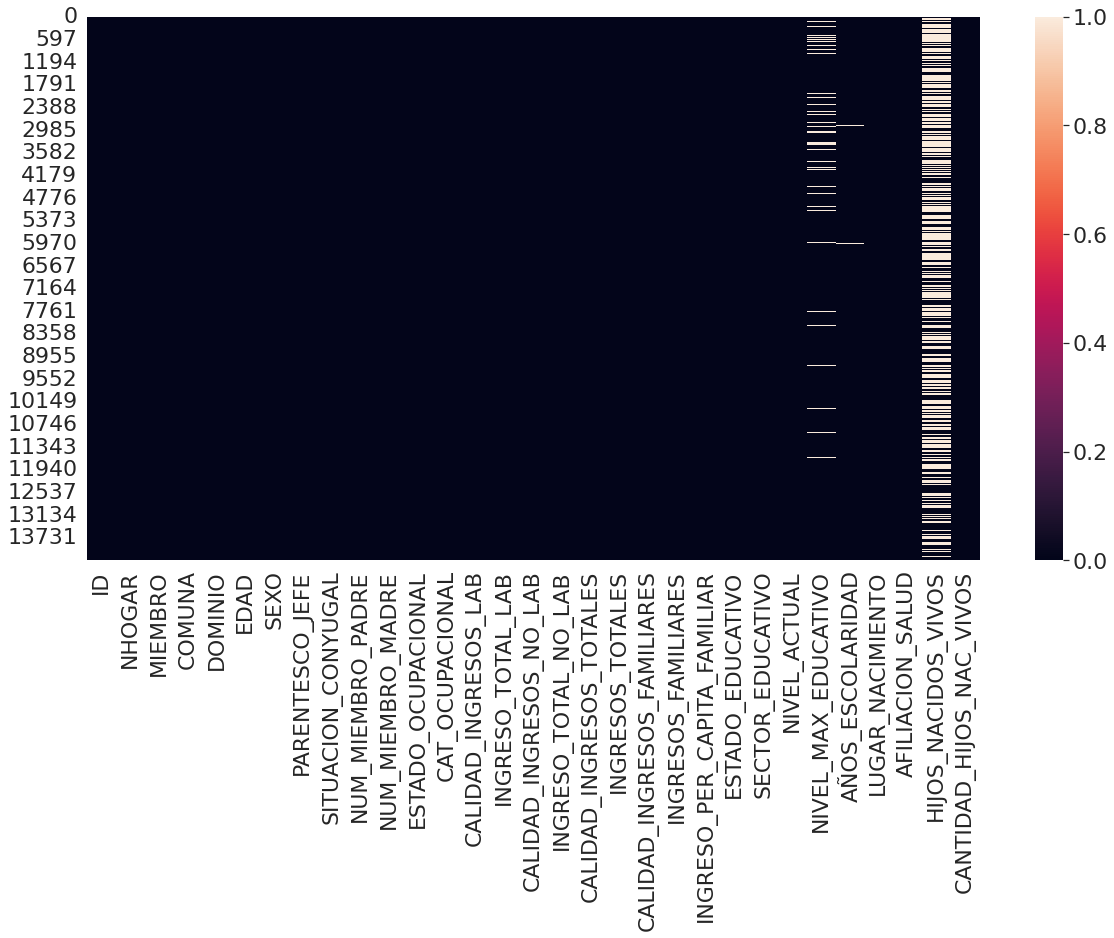

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

Podemos ver que faltan datos principalmente en 3 columnas, pero estas no van a ser usadas en el analiis, igualmente vamos a reemplazar los faltantes con nulos. **Esto no se entiende muy bien, en especial lo que hiciste en la parte de abajo del codigo. Por lo general, las matrices de nulos se usan para ver la correlacion visual de nulos entre columnas, es decir, si dos columnas con nulos coinciden en las ocurrencias de nulos. Ademas te recomiendo que no uses msgno, no porque sea mala, sino porque podes realizar lo mismo utilizando las otras librerias que estan mas consolidadas. Msgno puede desaparecer el dia de mañana**

In [ ]:


# replace '0' values with 'nan' (reemplaza los 0 con nulos)
df[['NHOGR','MIEMBRO','COMUNA','EDAD','INGRESO_TOTAL_LAB','INGRESO_TOTAL_NO_LAB','INGRESOS_TOTALES','INGRESOS_FAMILIARES','INGRESO_PER_CAPITA_FAMILIAR']].replace(0, np.nan)
# count the number of nan values in each column
df.head()

,ID,NHOGR,MIEMBRO,COMUNA,DOMINIO,EDAD,SEXO,PARENTESCO_JEFE,SITUACION_CONYUGAL,NUM_MIEMBRO_PADRE,...,INGRESO_PER_CAPITA_FAMILIAR,ESTADO_EDUCATIVO,SECTOR_EDUCATIVO,NIVEL_ACTUAL,NIVEL_MAX_EDUCATIVO,ANOS_ESCOLARIDAD,LUGAR_NACIMIENTO,AFILIACION_SALUD,HIJOS_NACIDOS_VIVOS,CANTIDAD_HIJOS_NAC_VIVOS
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


In [ ]:
df.shape

(14319, 31)

In [ ]:
df.describe()

,ID,NHOGR,MIEMBRO,COMUNA,EDAD,INGRESO_TOTAL_LAB,INGRESO_TOTAL_NO_LAB,INGRESOS_TOTALES,INGRESOS_FAMILIARES,INGRESO_PER_CAPITA_FAMILIAR
count,14319.000000,14319.000000,14319.000000,14319.000000,14319.00000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000
mean,2710.024094,1.009638,2.144982,7.620644,38.81549,20078.626440,6016.234583,26094.861024,70212.818423,26192.009638
std,1535.910251,0.126376,1.354969,4.236359,23.11017,34698.173111,16065.350052,37152.503186,62685.684278,27463.908496
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1473.000000,1.000000,1.000000,4.000000,20.00000,0.000000,0.000000,0.000000,30000.000000,10500.000000
50%,2611.000000,1.000000,2.000000,8.000000,37.00000,2500.000000,0.000000,16000.000000,54000.000000,19900.000000
75%,3898.000000,1.000000,3.000000,11.000000,57.00000,30000.000000,4000.000000,37000.000000,90000.000000,33500.000000
max,5795.000000,7.000000,19.000000,15.000000,100.00000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000


##Exploramos el dataset en busqueda de insights


**Hubiera sido interesante que crearas secciones de ingresos (bajos, medios, altos, muy altos) basadas en los quartiles y luego ploteado como grafico de barras.
Te permite ya tener una nueva variable que puede tener peso predictivo y para graficar hubiese quedado, probablemente, algo mas significativo.**

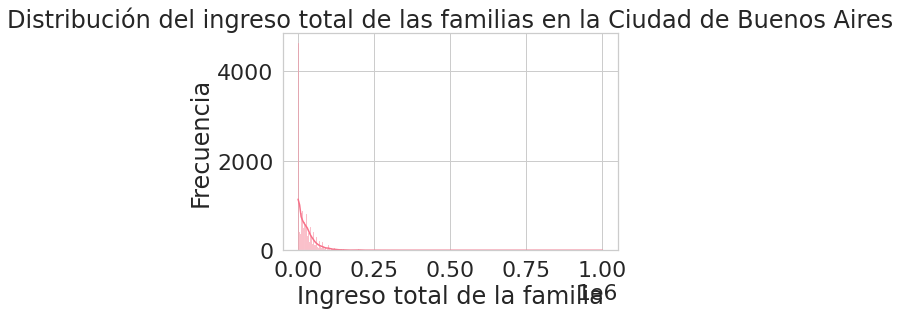

In [ ]:


# Visualizar la distribución del ingreso total de las familias
sns.histplot(data=df, x='INGRESOS_TOTALES', kde=True)
plt.xlabel('Ingreso total de la familia')
plt.ylabel('Frecuencia')
plt.title('Distribución del ingreso total de las familias en la Ciudad de Buenos Aires')
plt.show()


Podemos también explorar la relación entre algunas variables y el ingreso total de las familias. Parece haber una correlación positiva débil entre el ingreso total de la familia y la edad de los miembros, lo que sugiere que las familias con miembros más viejos tienden a tener ingresos más altos en promedio. **Aca idealmente deberias haber usado una iteracion para plotear todas las variables cuantitativas en relación al ingreso**

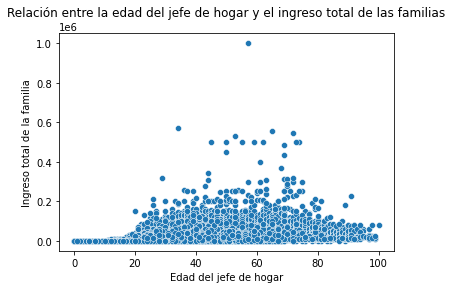

In [ ]:


# Exploramos la relación entre la edad del jefe de hogar y el ingreso total de la familia
sns.scatterplot(data=df, x='EDAD', y='INGRESOS_TOTALES')
plt.xlabel('Edad del jefe de hogar')
plt.ylabel('Ingreso total de la familia')
plt.title('Relación entre la edad del jefe de hogar y el ingreso total de las familias')
plt.show()


**Lo que graficas a continuación no es un scatter plot ni muestra dispersión, sino distribución**

Text(0, 0.5, 'Afiliación a Salud')

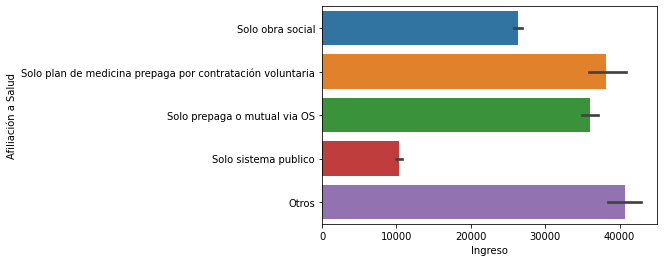

In [ ]:
import seaborn as sns

# crear un diagrama de dispersión para la afiliación a salud y el ingreso total utilizando Scatterplot y Axes-level
ax = sns.barplot(data=df, x="INGRESO_PER_CAPITA_FAMILIAR", y="AFILIACION_SALUD")

# cambiar el nombre del eje X a "Obra Social"
ax.set_xlabel("Ingreso")

# cambiar el nombre del eje Y a "Afiliación a Salud"
ax.set_ylabel("Afiliación a Salud")

In [ ]:
# Mostramos el nombre y tipo de todas las columnas
print(df.dtypes)

ID                              int64
NHOGR                           int64
MIEMBRO                         int64
COMUNA                          int64
DOMINIO                        object
EDAD                            int64
SEXO                           object
PARENTESCO_JEFE                object
SITUACION_CONYUGAL             object
NUM_MIEMBRO_PADRE              object
NUM_MIEMBRO_MADRE              object
ESTADO_OCUPACIONAL             object
CAT_OCUPACIONAL                object
CALIDAD_INGRESOS_LAB           object
INGRESO_TOTAL_LAB               int64
CALIDAD_INGRESOS_NO_LAB        object
INGRESO_TOTAL_NO_LAB            int64
CALIDAD_INGRESOS_TOTALES       object
INGRESOS_TOTALES                int64
CALIDAD_INGRESOS_FAMILIARES    object
INGRESOS_FAMILIARES             int64
INGRESO_PER_CAPITA_FAMILIAR     int64
ESTADO_EDUCATIVO               object
SECTOR_EDUCATIVO               object
NIVEL_ACTUAL                   object
NIVEL_MAX_EDUCATIVO            object
ANOS_ESCOLAR

##AGRUPACION POR FAMILIA

In [ ]:
print(df.columns)


Index(['ID', 'NHOGR', 'MIEMBRO', 'COMUNA', 'DOMINIO', 'EDAD', 'SEXO',
       'PARENTESCO_JEFE', 'SITUACION_CONYUGAL', 'NUM_MIEMBRO_PADRE',
       'NUM_MIEMBRO_MADRE', 'ESTADO_OCUPACIONAL', 'CAT_OCUPACIONAL',
       'CALIDAD_INGRESOS_LAB', 'INGRESO_TOTAL_LAB', 'CALIDAD_INGRESOS_NO_LAB',
       'INGRESO_TOTAL_NO_LAB', 'CALIDAD_INGRESOS_TOTALES', 'INGRESOS_TOTALES',
       'CALIDAD_INGRESOS_FAMILIARES', 'INGRESOS_FAMILIARES',
       'INGRESO_PER_CAPITA_FAMILIAR', 'ESTADO_EDUCATIVO', 'SECTOR_EDUCATIVO',
       'NIVEL_ACTUAL', 'NIVEL_MAX_EDUCATIVO', 'ANOS_ESCOLARIDAD',
       'LUGAR_NACIMIENTO', 'AFILIACION_SALUD', 'HIJOS_NACIDOS_VIVOS',
       'CANTIDAD_HIJOS_NAC_VIVOS'],
      dtype='object')


In [ ]:
# Filtrar los miembros mayores de 18 años
df_mayores = df[df['EDAD'] > 18]

# Agrupar por ID familiar y sumar las variables relevantes
df_familias = df.groupby('ID').agg({
    'INGRESOS_FAMILIARES': 'sum',
    'MIEMBRO': 'count',
    'INGRESO_PER_CAPITA_FAMILIAR': 'mean',
    'INGRESO_TOTAL_LAB': 'sum',
    'COMUNA':'first',
    'EDAD':'mean'
})
# Renombrar las columnas
df_familias = df_familias.rename(columns={
    'INGRESOS_FAMILIARES': 'INGRESOS_TOTALES_FAMILIARES',
    'MIEMBRO': 'NUM_INTEGRANTES',
    'INGRESO_PER_CAPITA_FAMILIAR': 'INGRESO_PER_CAPITA_PROMEDIO',
    'INGRESO_TOTAL_LAB': 'INGRESOS_LABORALES_TOTALES',
    'NIVEL_MAX_EDUCATIVO': 'NIVEL_EDUCATIVO_MAXIMO',
    'COMUNA': 'COMUNA',
    'EDAD': 'MEDIANA_ADULTOS'
})

# Restablecer el índice del DataFrame
df_familias = df_familias.reset_index()

print(df_familias.head())


   ID  INGRESOS_TOTALES_FAMILIARES  NUM_INTEGRANTES  \
0   1                        36000                2   
1   2                       300000                3   
2   3                       139500                3   
3   4                        22000                2   
4   5                        53000                2   

   INGRESO_PER_CAPITA_PROMEDIO  INGRESOS_LABORALES_TOTALES  COMUNA  \
0                       9000.0                           0       5   
1                      33333.0                       70000       2   
2                      15500.0                       44000      10   
3                       5500.0                           0      15   
4                      26500.0                       53000       8   

   MEDIANA_ADULTOS  
0        18.000000  
1        28.333333  
2        13.333333  
3        17.000000  
4        21.000000  


En este ejemplo, estamos cargando los datos desde un archivo CSV llamado datos_familiares.csv (asumiendo que este es el nombre del archivo que contiene los datos que mencionaste anteriormente). Luego, usamos el método groupby() para agrupar los datos por ID familiar y seleccionamos las variables relevantes mediante una lista de nombres de columnas ('INGRESOS_FAMILIARES', 'NUM_MIEMBRO_PADRE', etc.). Finalmente, usamos el método mean() para obtener la media de cada variable para cada grupo de ID familiar.

# Pregunta 1: ¿La ubicacion Geografica influye en el ingreso familiar?
---



En estas visualizaciones haremos un recorrido por los datos mas importantes de la ciudad de buenos aires e intentaremos llegar a la conclusion de si es homogenea o no en sus caracteristicas

###Distribucion de empleo en la ciudad
podemos ver que en proporcion la comuna con mas desocupados e inactivos es la 8. Mientras que el resto de las comunas (menos la 9) tienen mas ocupados que inactivos. **Ojo con esto, que las barras sean mas grandes solo indica mayor cantidad de ocurrencias dentro del dataset, pero comparativamente lo mas importante aca es la proporcionalidad del hue para cada comuna. Y en general las proporcionalidades son relativamente similares. Otro tema a tener en cuenta es si inactivo no deberia ser parte desocupado, porque a los efectos practicos ambas categorias, a priori, van a tener el mismo valor predictivo.**

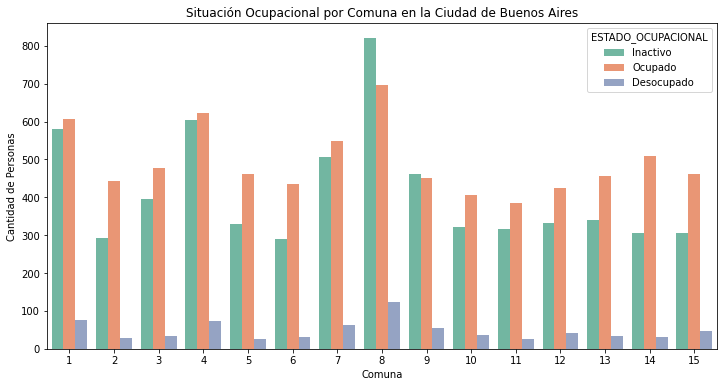

In [ ]:
#creamos un gráfico de barras apiladas para comparar la situación ocupacional en cada comuna
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='COMUNA', hue='ESTADO_OCUPACIONAL', palette='Set2')
plt.title('Situación Ocupacional por Comuna en la Ciudad de Buenos Aires')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Personas')
plt.show()

###DISTRIBUCION GEOGRAFICA DE FAMILIAS

En este primer grafico de barras podemos observar que las comunas 1 (Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución), 4 (La Boca, Barracas, Parque Patricios y Nueva Pompeya) y 8 (Villa Soldati, Villa Riachuelo y Villa Lugano) tienen una mayor concentracion de familias respecto a las demas comunas. Y las comunas 10 (Villa Real, Monte Castro, Versalles, Floresta, Vélez Sarsfield y Villa Luro) y 11 (Villa General Mitre, Villa Devoto, Villa del Parque y Villa Santa Rita) son las que menos concentracion de familias tienen. Esto es importante ya que es importante tenerlo en cuenta al interpretar los resultados de la regresión y comprender mejor la relación entre las variables.

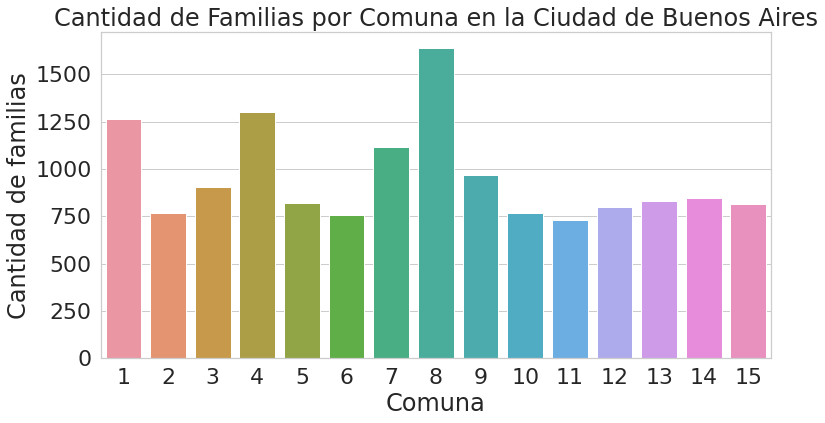

In [ ]:
# Creamos un gráfico de barras para comparar la cantidad de personas en cada comuna

temp_df = df.loc[:, ['ID', 'COMUNA']].groupby(['COMUNA']).count().reset_index().sort_values('ID', ascending=False).copy()
temp_df.rename({'COMUNA':'Comuna', 'ID': 'Cantidad de familias'}, axis=1, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='Comuna', y='Cantidad de familias', data=temp_df)
plt.title('Cantidad de Familias por Comuna en la Ciudad de Buenos Aires')
plt.show()

###DISTRIBUCION DEL INGRESO FAMILIAR POR COMUNA

Para ver si la ubicación geográfica influye en el ingreso familiar, podemos utilizar un diagrama de dispersión donde el eje x sea la comuna y el eje y sea el ingreso total familiar. La visualización muestra la distribución de ingresos familiares para cada una de las comunas de la Ciudad de Buenos Aires. Podemos ver que las comunas 14, 2 y 13 tienen una mediana de ingresos familiares más alta en comparación con las otras comunas, lo que indica que las familias en esas comunas tienen un ingreso más alto en promedio. Por otro lado, las comunas 8, 9, 3 y 4 tienen una mediana de ingresos familiares más baja, lo que indica que las familias en esas comunas tienen un ingreso más bajo en promedio.

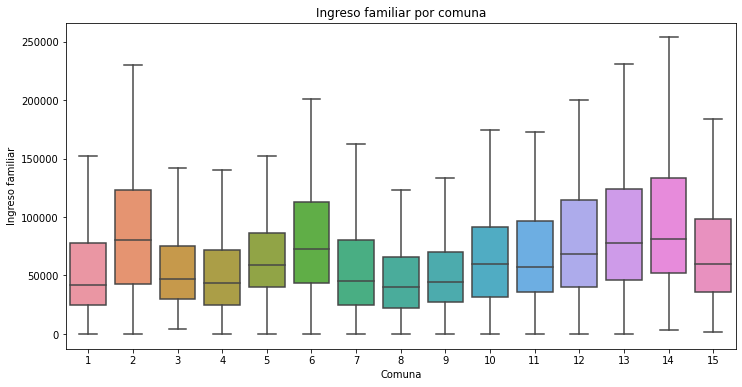

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='COMUNA', y='INGRESOS_FAMILIARES', data=df, showfliers=False)
plt.title('Ingreso familiar por comuna')
plt.xlabel('Comuna')
plt.ylabel('Ingreso familiar')
plt.show()



Para finalizar podemos concluir que en este caso se cumple la hipótesis alternativa. Esta sugiere que sí hay una diferencia significativa en el ingreso familiar promedio entre distintas zonas geográficas en la Ciudad de Buenos Aires. En este caso, se espera que el ingreso promedio varíe en función de la ubicación geográfica de los hogares. Si se acepta esta hipótesis, se concluye que la ubicación geográfica sí tiene un impacto significativo en el ingreso familiar promedio.

# 2. ¿Cual es la relacion entre el numero de integrantes de la familia y el ingreso total?

###REGRESION LINEAL

**Por lo general statsmodels no es la primera opcion, se suele usar mas scikitlearn**

In [ ]:
# importación de las librerias necesarias
import statsmodels.api as sm

podemos definir nuestras variables dependiente e independientes. En este caso, la variable dependiente es el ingreso total de la familia y las variables independientes son las características familiares que queremos incluir en nuestra regresión. Podemos seleccionar estas columnas del DataFrame df_familias que creamos anteriormente:

**Aca falto separar el dataframe en uno de entrenamiento y testeo, para probar el modelo con datos no utilizados.**

In [ ]:
X = df_familias[['NUM_INTEGRANTES', 'INGRESO_PER_CAPITA_PROMEDIO', 'INGRESOS_LABORALES_TOTALES']]
y = df_familias['INGRESOS_TOTALES_FAMILIARES']

# Ahora podemos ajustar nuestro modelo de regresión utilizando la clase OLS (Ordinary Least Squares)
# de la librería statsmodels. Para ello, simplemente necesitamos llamar al método fit() del modelo:

model = sm.OLS(y, sm.add_constant(X)).fit()

# hemos añadido una constante a nuestro modelo utilizando el método add_constant()
# de statsmodels. La constante permite modelar el intercepto de la regresión.

print(model.summary())
#Finalmente, podemos imprimir un resumen del modelo utilizando el método summary():


                                 OLS Regression Results                                
Dep. Variable:     INGRESOS_TOTALES_FAMILIARES   R-squared:                       0.764
Model:                                     OLS   Adj. R-squared:                  0.764
Method:                          Least Squares   F-statistic:                     6240.
Date:                         Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                                 17:37:45   Log-Likelihood:                -75282.
No. Observations:                         5795   AIC:                         1.506e+05
Df Residuals:                             5791   BIC:                         1.506e+05
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

**Me parece que habia muchas mas variables que se podian emplear dentro del moedelo, ademas de separar los datos para testear su capacidad real de generalización**

*   El modelo de regresión que hemos
aplicado nos muestra que hay una relación positiva entre el número de integrantes de la familia y los ingresos familiares totales. Es decir, a medida que aumenta el número de integrantes en la familia, es posible que haya más fuentes de ingresos en la familia, lo que puede llevar a un mayor ingreso familiar.

*   Por otro lado, hemos observado que existe una relación negativa entre el ingreso per cápita promedio de la familia y los ingresos familiares totales. Es decir, a medida que aumenta el ingreso per cápita promedio de la familia, disminuyen los ingresos familiares totales.
Esta situación puede ser vista como negativa en el sentido de que una familia con ingresos más altos individualmente podría no estar necesariamente mejor en términos de su ingreso total, y esto puede indicar una desigualdad económica dentro de la familia.

*   hemos encontrado una relación positiva entre los ingresos laborales totales y los ingresos familiares totales. Es decir, si los miembros de la familia tienen más ingresos por trabajo, es más probable que la familia en su conjunto tenga un ingreso alto.

*   l valor de R-cuadrado ajustado de la regresión es 0.764, lo que significa que aproximadamente el 76.4% de la variabilidad en el ingreso familiar total puede explicarse por las tres variables incluidas en el modelo (NUM_INTEGRANTES, INGRESO_PER_CAPITA_PROMEDIO e INGRESOS_LABORALES_TOTALES). Esto indica que el modelo de regresión tiene un buen ajuste y que las variables seleccionadas son relevantes para explicar la variación en el ingreso familiar total.** Esto esta mal. El modelo solo corrio con esas variables seleccionadas, asi que solo explica en relación a esas variables. Para ver el comportamiento real con todas las variables originales deberias correr el modelo con regularizacion L1 o Lasso**

*   El valor de AIC y BIC en la regresión es el mismo, lo que indica que el modelo no está sobrecargado y no hay variables redundantes que puedan estar afectando negativamente la capacidad del modelo para explicar la variación en el ingreso familiar total.

En resumen, podemos decir que el tamaño de la familia y los ingresos laborales totales tienen un impacto positivo en los ingresos familiares totales, mientras que el ingreso per cápita promedio tiene un impacto negativo.

Para finalizar podemos concluir que en este caso se cumple la hipótesis alternativa. Esta sugiere que sí existe una correlación significativa entre el número de integrantes de la familia y el ingreso total familiar en la Ciudad de Buenos Aires. En este caso, se espera que el tamaño de la familia tenga un efecto en el ingreso total, pudiendo ser positivo o negativo. Si se acepta esta hipótesis, se concluye que el tamaño de la familia tiene un impacto significativo en el ingreso total familiar.

# 3. ¿Existe una relación entre el ingreso per cápita familiar y la situación conyugal y edad de los miembros del hogar?

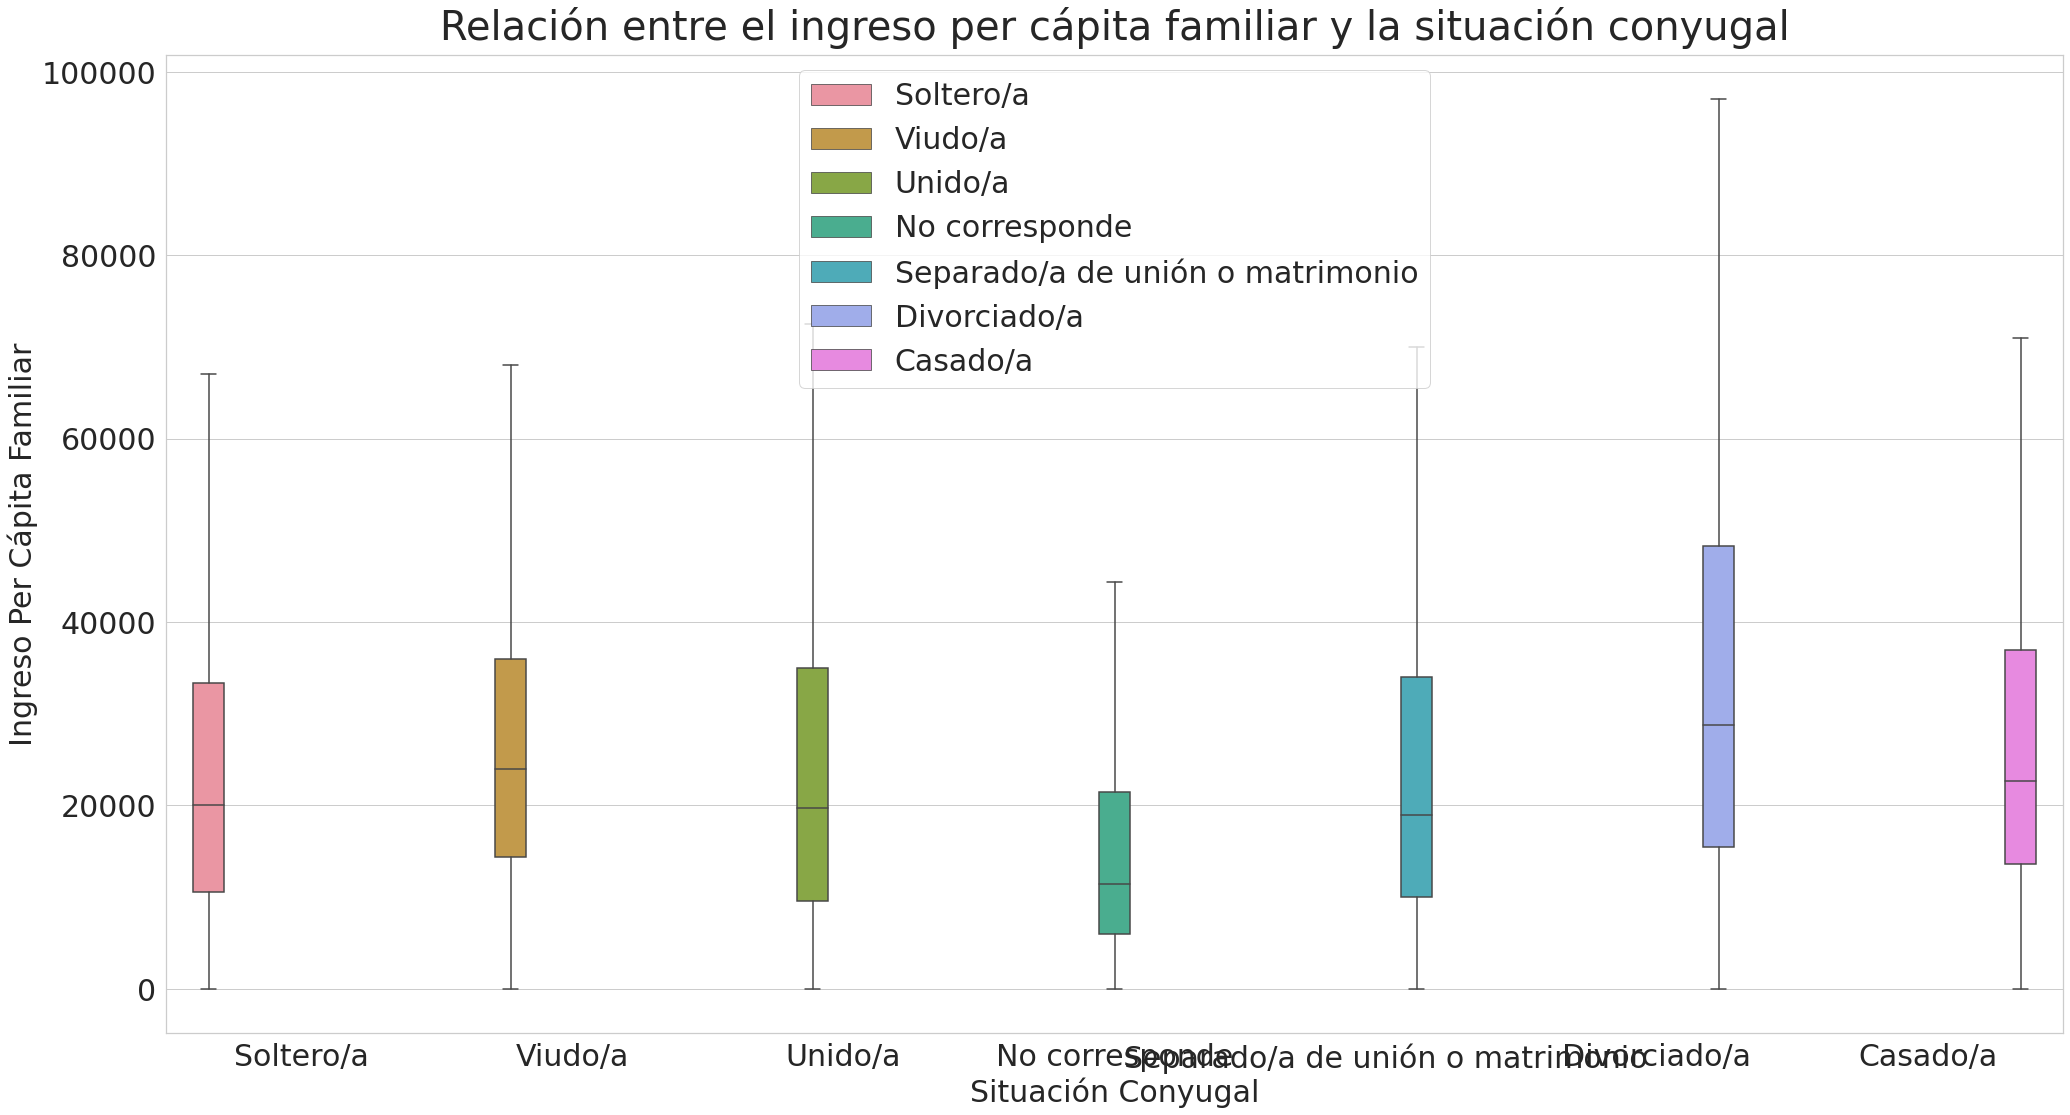

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(34,18))

# Configuración de tamaño de las etiquetas y las categorías
sns.set(font_scale=2)
sns.set_style('whitegrid')
sns.set_palette('husl')

# Graficar el boxplot
sns.boxplot(x=df.SITUACION_CONYUGAL, y=df.INGRESO_PER_CAPITA_FAMILIAR, hue=df.SITUACION_CONYUGAL, showfliers=False)

plt.title('Relación entre el ingreso per cápita familiar y la situación conyugal', fontsize=40, verticalalignment='bottom')
plt.xlabel('Situación Conyugal', fontsize=30)
plt.ylabel('Ingreso Per Cápita Familiar', fontsize=30)

# Aumentar el tamaño de las categorías del eje x
plt.tick_params(axis='x', which='major', labelsize=30)

# Aumentar el tamaño de las etiquetas del eje y
plt.tick_params(axis='y', which='major', labelsize=30)

# Aumentar el tamaño de la leyenda
plt.legend(fontsize=30)

plt.show()


Podemos ver que los que estan divorciados, viudos y unidos ganan mas en promedio que los solteros, ademas tienen valores maximos mas altos.

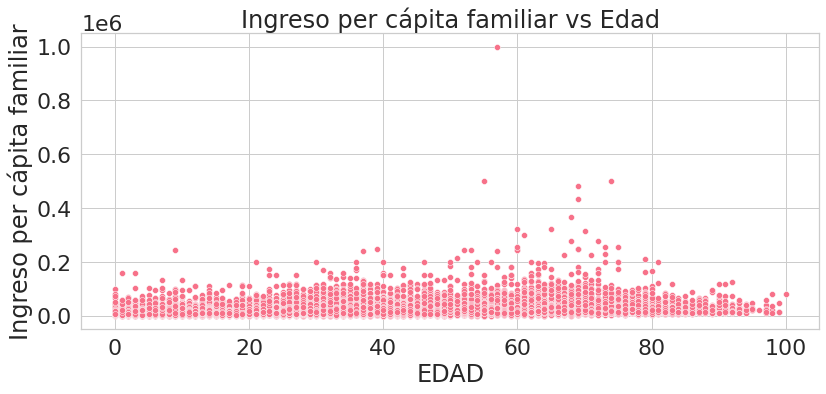

In [ ]:
# crear el lienzo para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# gráfico de dispersión de ingreso per cápita familiar vs edad
sns.scatterplot(data=df, x="EDAD", y="INGRESO_PER_CAPITA_FAMILIAR", ax=ax)
ax.set_title("Ingreso per cápita familiar vs Edad")
ax.set_xlabel("EDAD")
ax.set_ylabel("Ingreso per cápita familiar")

# ajustar los gráficos para evitar superposiciones
fig.tight_layout()

# mostrar el gráfico
plt.show()

In [ ]:
# Seleccionar variables de interés
df_subset = df[['ingreso_per_capita_familiar', 'situacion_conyugal', 'edad', 'sexo',]]

# Crear conjunto de gráficos de dispersión
sns.pairplot(df_subset, hue='sexo', diag_kind='hist')


KeyError: ignored

el ultimo grafico relación entre todas las variables al mismo tiempo, lo que nos permite identificar patrones y relaciones complejas entre las variables. Com que a medida que crecemos vamos teniendo mas porcentaje del ingreso familiar.

Concluimos que H0 es falso y decimos que rechazamos H0. En este caso concluiremos que existe evidencia estadística para la hipótesis alternativa Ha ya que Existe una relación significativa entre el ingreso per cápita familiar y la situación conyugal y la edad de los miembros del hogar.


# 4.  ¿Existe una relación entre la educación y el ingreso total de los hogares por familia en la Ciudad de Buenos Aires?